Example of using visualization code with eeghdf file
Start by using the matplotlib backend


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import libraries
%matplotlib inline
# %matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import pandas as pd
import numpy as np
import eeghdf
from pprint import pprint

import eegvis.stacklineplot as stacklineplot
import eegvis.montageview as montageview

In [3]:
# first open an eeghdf file

In [4]:
eeg_file_name = "/home/clee/code/eegml/eeghdf/data/absence_epilepsy.eeghdf"

In [5]:
hf = eeghdf.Eeghdf(eeg_file_name)

In [6]:
signals = hf.phys_signals
goto_sec = 5.0 # note since this centered here, to show first 10 seconds need to set this to 5 or epoch_width_sec/2
epoch_width_sec = 10.0 #seconds
FS = hf.sample_frequency
chstart =0
chstop = 19
ylabels = hf.electrode_labels
yscale = 1.0

```
Signature:
stacklineplot.show_epoch_centered(
    signals,
    goto_sec,
    epoch_width_sec,
    chstart,
    chstop,
    fs,
    ylabels=[],
    yscale=1.0,
    topdown=True,
    ax=None,
    **kwargs,
)
Docstring:
@signals array-like object with signals[ch_num, sample_num]
@goto_sec where to go in the signal to show the feature
@epoch_width_sec length of the window to show in secs
@chstart   which channel to start
@chstop    which channel to end
@labels_by_channel
@yscale
@fs sample frequency (num samples per second)
File:      ~/code/eegml/eegvis/eegvis/stacklineplot.py
Type:      function
    ```

<AxesSubplot:xlabel='time (s)'>

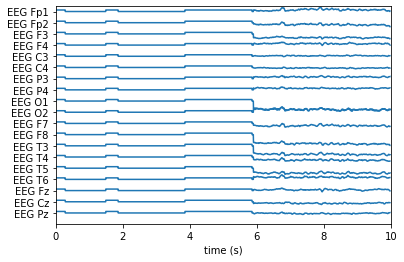

In [7]:
# the simpliest thing you can do is display the eeg as it is recorded

stacklineplot.show_epoch_centered(signals, goto_sec, epoch_width_sec, fs=FS, chstart=chstart, chstop=chstop, ylabels=ylabels)

In [8]:
signals = hf.phys_signals
goto_sec = 15.0 # note since this centered here, to show first 10 seconds need to set this to 5 or epoch_width_sec/2
epoch_width_sec = 30.0 #seconds
FS = hf.sample_frequency
chstart =0
chstop = 19
ylabels = hf.shortcut_elabels
yscale = 1.0

<AxesSubplot:xlabel='time (s)'>

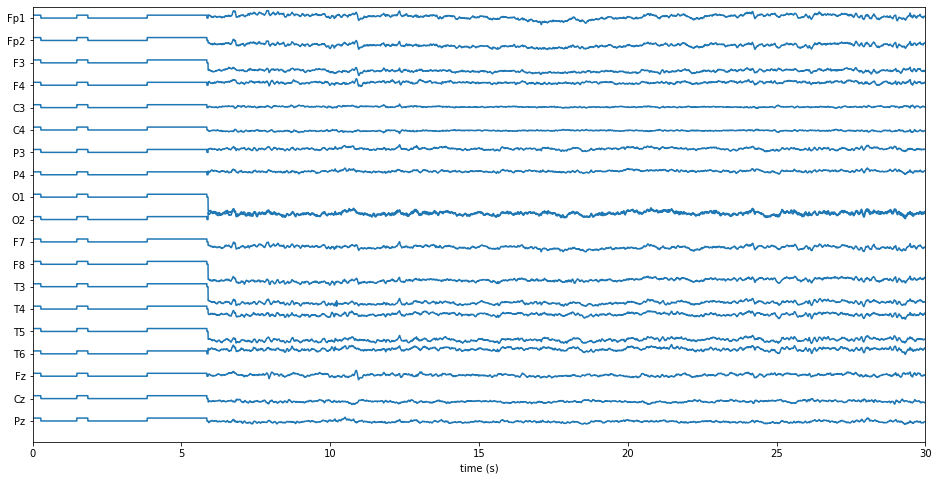

In [9]:
plt.figure(figsize=(16,8))

stacklineplot.show_epoch_centered(signals, goto_sec, epoch_width_sec, fs=FS, chstart=chstart, chstop=chstop, ylabels=ylabels)

In [10]:
stacklineplot.stackplot?

Signature:
stacklineplot.stackplot(
    marray,
    seconds=None,
    start_time=None,
    ylabels=[],
    yscale=1.0,
    topdown=False,
    ax=None,
    **kwargs,
)
Docstring:
will plot a stack of traces one above the other assuming
@marray contains the data you want to plot
marray.shape = numRows, numSamples

@seconds = with of plot in seconds for labeling purposes (optional)
@start_time is start time in seconds for the plot (optional)

@ylabels a list of labels for each row ("channel") in marray
@yscale with increase (mutiply) the signals in each row by this amount
File:      ~/code/eegml/eegvis/eegvis/stacklineplot.py
Type:      function


In [11]:
# create another montage view for ourselves, we can use predefined ones
# these are factory functions which need to know the relationship bewteen labels and signal number
# can see current defined ones in montageview.MONTAGE_BUILTINS.keys()
db = montageview.MONTAGE_BUILTINS['double banana'](hf.shortcut_elabels)

<AxesSubplot:xlabel='time (s)'>

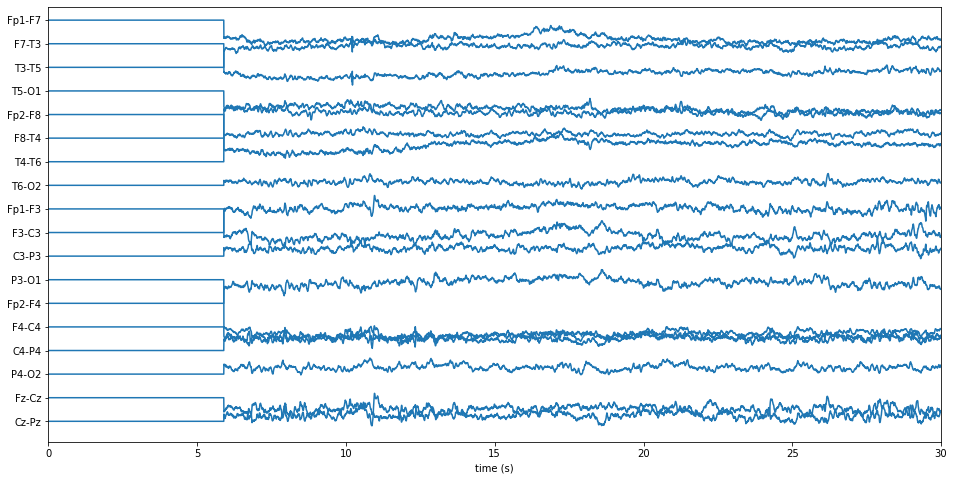

In [12]:
plt.figure(figsize=(16,8))
stacklineplot.show_montage_centered(signals, db, # put montage here
                                   goto_sec,
                                   epoch_width_sec,
                                   chstart,
                                   chstop,
                                   FS,
                                   yscale=3.0) # the yscale multiples the signals by this number, it is a bit of a hack

In [13]:
# now lets try a the simplier stackplot and heatmap

In [14]:
# for 19 channels
NUM_CH = 19
NUM_CHUNKS = 20
heatmap_ex = np.random.uniform(size=(NUM_CH, NUM_CHUNKS))

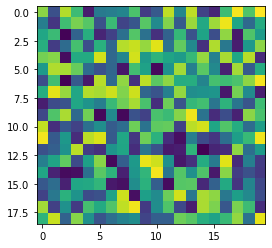

In [15]:
plt.imshow(heatmap_ex)

In [16]:
tarray = signals[0:19,0:int(FS*10)].T

<AxesSubplot:xlabel='time (s)'>

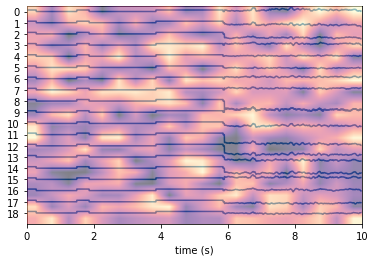

In [21]:
stacklineplot.stackplot_t_with_heatmap(tarray,
                                      seconds=10.0, # without seconds shows samples
                                      heatmap_image=heatmap_ex)

```
Signature:
stacklineplot.stackplot_t_with_heatmap(
    tarray,
    seconds=None,
    start_time=None,
    ylabels=[],
    yscale=1.0,
    topdown=False,
    ax=None,
    linecolor=None,
    linestyle=None,
    heatmap_image=None,
    alpha=0.5,
    cmap='magma',
)
Docstring:
will plot a stack of traces one above the other assuming
@tarray is an nd-array like object with format
tarray.shape =  numSamples, numRows

@seconds = with of plot in seconds for labeling purposes (optional)
@start_time is start time in seconds for the plot (optional)

@ylabels a list of labels for each row ("channel") in marray
@yscale with increase (mutiply) the signals in each row by this amount

@ax is the option to pass in a matplotlib axes obj to draw with
@heatmap_image should be an ndarray usually this will be of shape something                    like (NUM_CH, NUM_TIME_STEPS)
@alpha is how to blend this 

generally want to choose a perceptually uniform colormap
inferno, magma, viridis, cividis, etc see also 
colorcet.cm.fire, .bmw etc for excellent colormaps

>>> heatmap_image = np.random.uniform(size=(NUM_CH, NUM_CHUNKS))
File:      ~/code/eegml/eegvis/eegvis/stacklineplot.py
Type:      function
```